# BigMart


# Introduction

BigMart is a grocery store that have many branches in the below analysis I will be trying to answer the below questions         
## Is there a condition or factor that affect the maximum retail price for a product ?
and that though answering some other questions like how many types of supermatkets for BigMart and how Many supermarket location type for big Mart,what is the sizes for each market for bigmart, what is most year that wall mart estblish a markets in it, what is the max retail price for big mart for an item, and what is the item types in the market,etc




# Steps
1. Data Exploring                                                                                                               
2. Data Cleaning                                                                                                         
3. Data Visualization
    1. Exploring the data using the visualization                                                                               
    2. Explaining the data using the visualization

# Reading and Exploring the Data 

In [1]:
#First we have to load the data and import the libabries that we may use 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib as matplotlib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#In this step Iam reading the set from the csv to the notebook using pandas
Big_Mart = pd.read_csv(r'C:\Users\FADIA\Downloads\Test.csv')

Big_Mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Data Cleaning

In [3]:
#checking if the item identifier is unique or represents more than a item in the set 
Big_Mart['Item_Identifier'].nunique()

1543

In [4]:
#checking how unique each column
Big_Mart.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [5]:
#checking the null in the set 
Big_Mart.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
# I took a decision to delete the null values instead of deleting the most null columns cause i decided to use the 2 columns 
#so i created a new set called Big_Mart_2 represent the set without the nulls 
Big_Mart_2=Big_Mart.dropna()
Big_Mart_2.shape[0]

3099

In [7]:
#reading the new set 
Big_Mart_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
13,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1
14,DRL59,16.750,LF,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1


In [8]:
#I figured out that there are different inputs in the column representing the same 2 words Regular and Low Fatso idecided to replace the wrong spelling 
list(Big_Mart_2['Item_Fat_Content'].value_counts().keys())

['Low Fat', 'Regular', 'LF', 'reg', 'low fat']

In [9]:
#replacing happening here 
Big_Mart_2["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat","reg":"Regular"}, inplace=True)
Big_Mart_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
13,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1
14,DRL59,16.750,Low Fat,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1


In [10]:
#checking the list of words in the column Outlet_Type
list(Big_Mart_2['Outlet_Type'].value_counts().keys())

['Supermarket Type1', 'Supermarket Type2']

In [11]:
#In here i decided to turn all teh set into small letters to be easy for me to work with it 
Big_Mart_2 = Big_Mart_2.applymap(lambda s:s.lower() if type(s) == str else s)
Big_Mart_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,fdw58,20.750,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,supermarket type1
5,fdh56,9.800,regular,0.063817,fruits and vegetables,117.1492,out046,1997,small,tier 1,supermarket type1
6,fdl48,19.350,regular,0.082602,baking goods,50.1034,out018,2009,medium,tier 3,supermarket type2
13,fdu11,4.785,low fat,0.092738,breads,122.3098,out049,1999,medium,tier 1,supermarket type1
14,drl59,16.750,low fat,0.021206,hard drinks,52.0298,out013,1987,high,tier 3,supermarket type1
...,...,...,...,...,...,...,...,...,...,...,...
5673,fdf46,7.070,low fat,0.094053,snack foods,116.0834,out018,2009,medium,tier 3,supermarket type2
5674,drl35,15.700,low fat,0.030704,hard drinks,43.2770,out046,1997,small,tier 1,supermarket type1
5675,fdw46,13.000,regular,0.070411,snack foods,63.4484,out049,1999,medium,tier 1,supermarket type1
5676,fdb58,10.500,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,supermarket type1


In [12]:
#i decided to rename the columns to shorter names so i can easily call it 
Big_Mart_2 = Big_Mart_2.rename(columns = {'Item_Identifier': 'item_identifier', 'Item_Weight': 'weight','Item_Fat_Content':'fat_content','Item_Visibility':'visibility',
                          'Item_Type':'item_type','Item_MRP':'max_retail_price','Outlet_Identifier':'outlet_identifier',
                         'Outlet_Establishment_Year':'outlet_establishment_year','Outlet_Size':'outlet_size','Outlet_Location_Type':'outlet_location_type','Outlet_Type':'outlet_type'}, inplace = False)
Big_Mart_2.head()
Big_Mart_2.reset_index(drop=True,inplace=True)

In [13]:
Big_Mart_2.head()

,item_identifier,weight,fat_content,visibility,item_type,max_retail_price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,fdw58,20.750,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,supermarket type1
1,fdh56,9.800,regular,0.063817,fruits and vegetables,117.1492,out046,1997,small,tier 1,supermarket type1
2,fdl48,19.350,regular,0.082602,baking goods,50.1034,out018,2009,medium,tier 3,supermarket type2
3,fdu11,4.785,low fat,0.092738,breads,122.3098,out049,1999,medium,tier 1,supermarket type1
4,drl59,16.750,low fat,0.021206,hard drinks,52.0298,out013,1987,high,tier 3,supermarket type1


In [14]:
list(Big_Mart_2['outlet_type'].value_counts().keys())

['supermarket type1', 'supermarket type2']

In [15]:
#decided to remove th eword supermarket 
Big_Mart_2["outlet_type"].replace({"supermarket type1": "type 1", "supermarket type2": "type 2"}, inplace=True)
Big_Mart_2.head()

,item_identifier,weight,fat_content,visibility,item_type,max_retail_price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,fdw58,20.750,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,type 1
1,fdh56,9.800,regular,0.063817,fruits and vegetables,117.1492,out046,1997,small,tier 1,type 1
2,fdl48,19.350,regular,0.082602,baking goods,50.1034,out018,2009,medium,tier 3,type 2
3,fdu11,4.785,low fat,0.092738,breads,122.3098,out049,1999,medium,tier 1,type 1
4,drl59,16.750,low fat,0.021206,hard drinks,52.0298,out013,1987,high,tier 3,type 1


In [16]:
#checking if there are any duplicats the answer is no :) 
Big_Mart_2.duplicated().sum()

0

# Exploring the data by visualization

### In this step will be navigating the the data in order to understand it more and be able to explain later on 

## Univariate Exploration Part 

In [17]:
#preparing the column item type to show it by count order 
item_order= Big_Mart_2['item_type'].value_counts().index

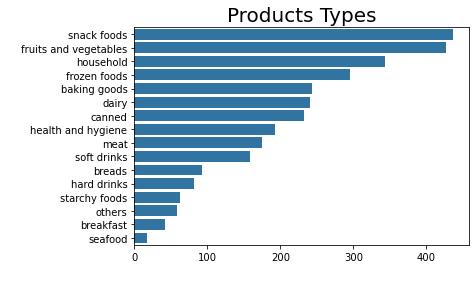

In [18]:
#this line to make sure that the color will be same color 
Base_color=sns.color_palette()[0]
#the count plot to show all the items that BigMart sell 
sns.countplot(data=Big_Mart_2, y='item_type',color=Base_color,order=item_order);
#plt.xticks(rotation =90);
plt.title('Products Types', fontsize=20);
plt.ylabel(' ');
plt.xlabel(' ');

In [19]:
#i am checking how the outlet"supermarket" distrbuted by its count in order to see if i will visualize it 
type_counts = Big_Mart_2['outlet_type'].value_counts()
type_counts

type 1    2481
type 2     618
Name: outlet_type, dtype: int64

In [20]:
# here i am trying Return the maximum proportion to  compute the length of the longest bar in terms of the proportion
n_big_mart=Big_Mart_2.shape[0]
max_type_count=type_counts[0]
max_prop = max_type_count/n_big_mart
print(max_prop)

0.8005808325266215


In [21]:
#making array ends with the maximum proportion
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 ])

In [22]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


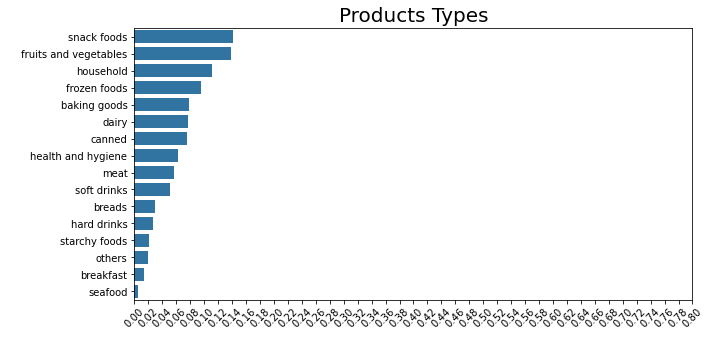

In [23]:
## here i am trying Return the maximum proportion to  compute the length of the longest bar in terms of the proportion
#but i doesn't work clear as i wanted it to be 
Base_color=sns.color_palette()[0]
plt.figure(figsize=(10, 5))
sns.countplot(data=Big_Mart_2, y='item_type',color=Base_color,order=item_order);
plt.xticks(tick_props * n_big_mart, tick_names)
plt.title('Products Types', fontsize=20);
plt.xticks(rotation =45);
plt.ylabel(' ');
plt.xlabel(' ');

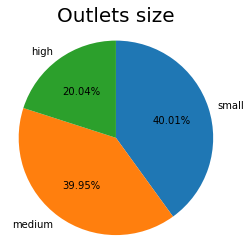

In [24]:
# the pie chart to show the count of different outlet sizes
outlet_size= Big_Mart_2['outlet_size'].value_counts()

plt.pie(outlet_size, labels = outlet_size.index, startangle = 90, counterclock = False, autopct="%0.2f%%");
plt.title('Outlets size', fontsize=20);

plt.axis('square');

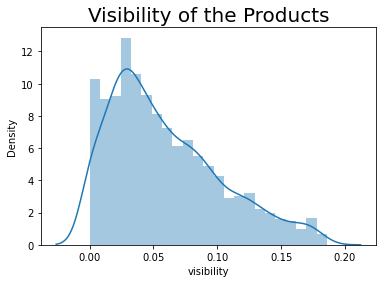

In [25]:
#in the store each item type has a float number represent its place to be visable in the store in this visual i checking 
#how the visibality distributs on the market and how high it can get for a product to be visiable and how low 
sns.distplot(Big_Mart_2['visibility']);
plt.title('Visibility of the Products', fontsize=20);


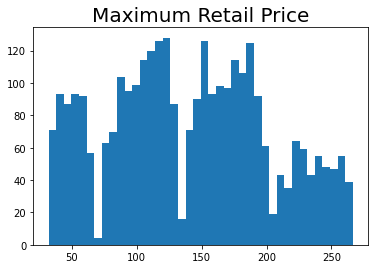

In [26]:
#in here i am checking the maxiuam retail price and how high it can get to 
plt.hist(data = Big_Mart_2, x = 'max_retail_price', bins = 40);
plt.title('Maximum Retail Price',fontsize=20);


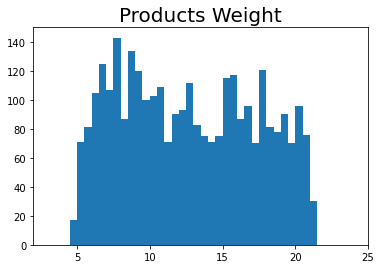

In [27]:
#in here i am checking the weight of a product and how high it can get to 

bins=np.arange(0,Big_Mart_2['weight'].max()+0.5,0.5)
plt.hist(data=Big_Mart_2,x="weight",bins=bins);
plt.xlim((2,25));
plt.title('Products Weight',fontsize=20);


## Bivariate Exploration Part 

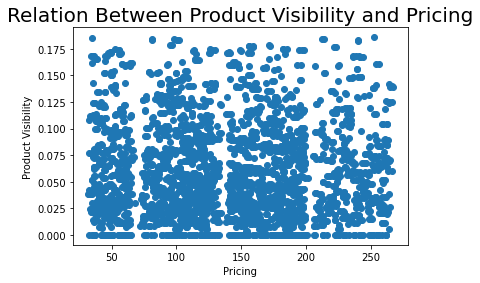

In [28]:
#in this part i decided to check the relation and correlations between 2 different columns 
#for examle in here i am checking if there is any relation between teh price and the product visibility 
plt.scatter(data=Big_Mart_2 , y ='visibility', x ='max_retail_price');
plt.title('Relation Between Product Visibility and Pricing',fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Product Visibility');

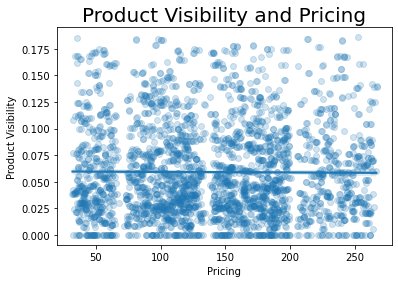

In [29]:
#I used the regrassion plot to understand the relation between the mention columns 
sns.regplot(data=Big_Mart_2 , y ='visibility', x ='max_retail_price', x_jitter=0.3,scatter_kws=({'alpha':1/5}));
plt.title('Product Visibility and Pricing',fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Product Visibility');

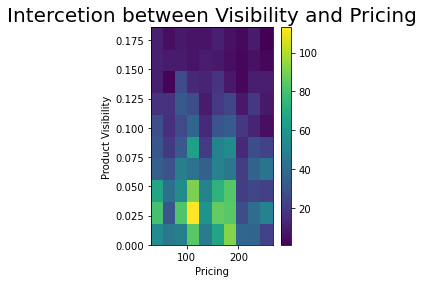

In [30]:
#hist 2d fuction to describe the intersection between max_retail_price and visibility
plt.subplot(1, 2, 2)
plt.hist2d(data = Big_Mart_2, x = 'max_retail_price', y = 'visibility',cmin=0.5)
plt.colorbar()
plt.title('Intercetion between Visibility and Pricing',fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Product Visibility');

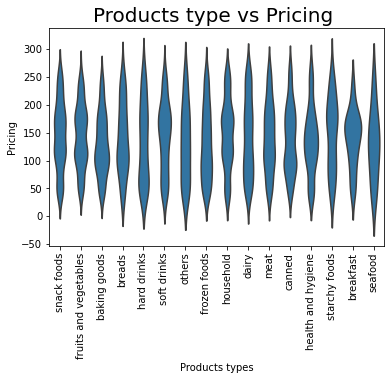

In [31]:
#violin plot to to show the the higer pricing for the item type 
color_base=sns.color_palette()[0]
sns.violinplot(data=Big_Mart_2,y='max_retail_price',x='item_type',color=color_base,inner=None);
plt.xticks(rotation=90);
plt.title('Products type vs Pricing ',fontsize=20);
plt.xlabel('Products types');
plt.ylabel('Pricing');

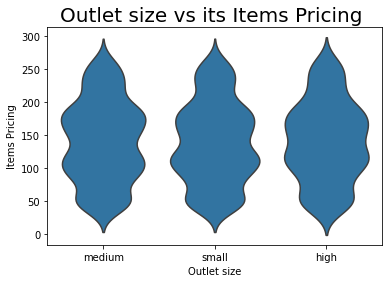

In [32]:
#vilon plot to show the most outlets lies in wish size 
color_base=sns.color_palette()[0]
sns.violinplot(data=Big_Mart_2,y='max_retail_price',x='outlet_size',color=color_base,inner=None);
plt.title('Outlet size vs its Items Pricing ',fontsize=20);
plt.xlabel('Outlet size');
plt.ylabel('Items Pricing');

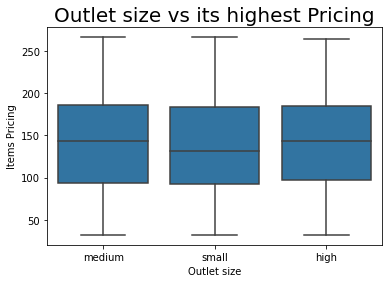

In [33]:
#the boxplot is to answer is the pricing get affected by the size of the outlet
color_base=sns.color_palette()[0]
sns.boxplot(data=Big_Mart_2,y='max_retail_price',x='outlet_size',color=color_base);
plt.title('Outlet size vs its highest Pricing',fontsize=20);
plt.xlabel('Outlet size');
plt.ylabel('Items Pricing');

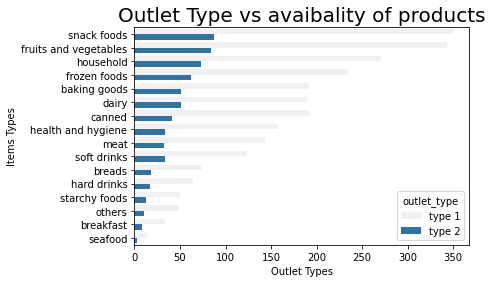

In [34]:
#big mart intersted to put more products to  thier super market into type 1 more than type 2
Base_color=sns.color_palette()[0]
sns.countplot(data=Big_Mart_2, y='item_type',color=Base_color,order=item_order, hue='outlet_type');
plt.title('Outlet Type vs avaibality of products',fontsize=20);
plt.xlabel('Outlet Types');
plt.ylabel('Items Types');

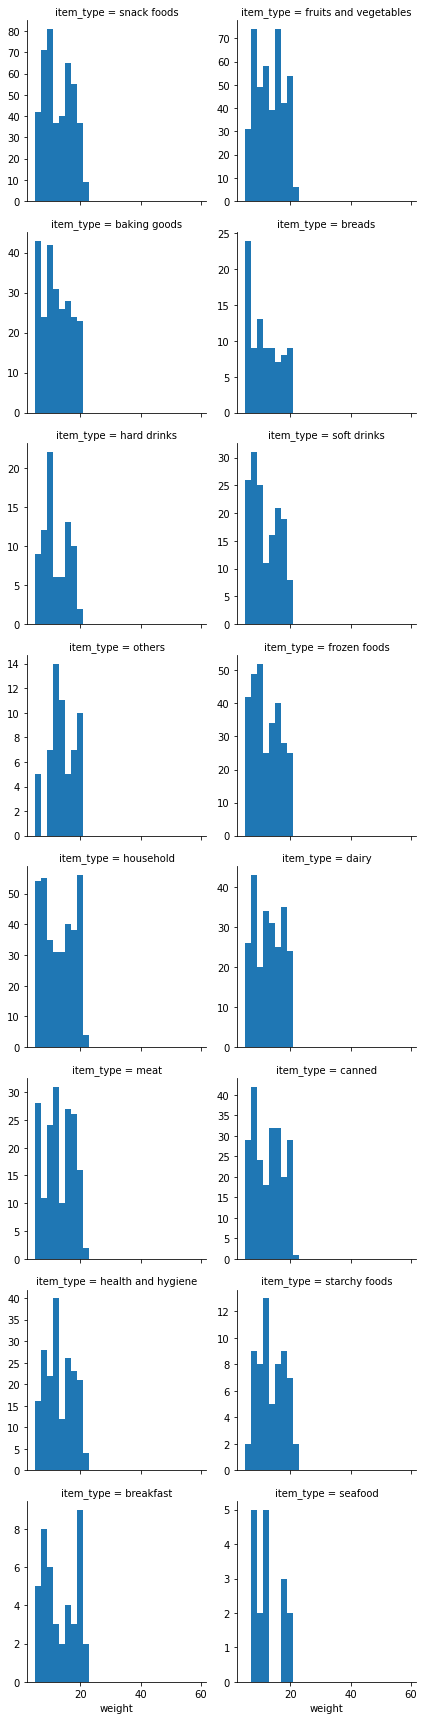

In [35]:
##in here i am showing the weight for each item type product accross the data 
bins = np.arange(5, 58+2, 2)

g = sns.FacetGrid(data = Big_Mart_2, col = 'item_type',col_wrap=2, sharey=False);

g.map(plt.hist,'weight',bins=bins);


### Multivariate Exploration Part 

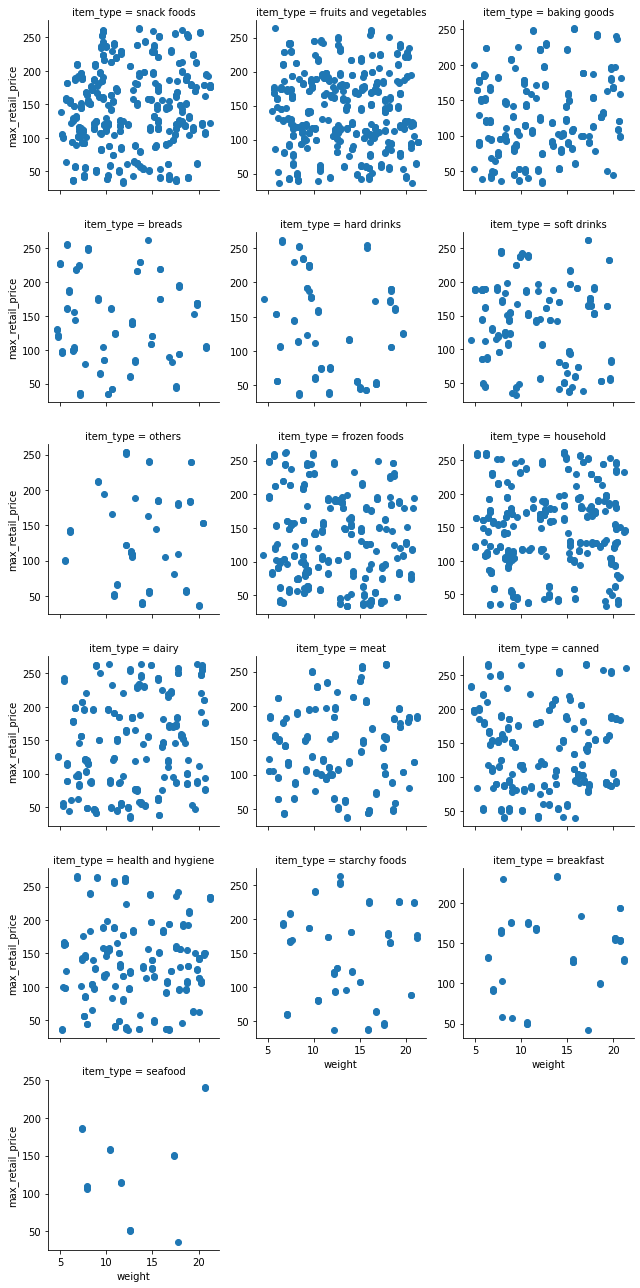

In [36]:
#in this part i am exploring the data by showing the patterns between more than columns together 
#in here i am checking if there any effect on the price cased by the weight and item together 
g = sns.FacetGrid(data = Big_Mart_2, col = 'item_type', col_wrap=3, sharey=False,margin_titles=True)
g.map(plt.scatter, 'weight','max_retail_price');

In [37]:
Big_Mart_2.tail()

,item_identifier,weight,fat_content,visibility,item_type,max_retail_price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
3094,fdf46,7.07,low fat,0.094053,snack foods,116.0834,out018,2009,medium,tier 3,type 2
3095,drl35,15.70,low fat,0.030704,hard drinks,43.2770,out046,1997,small,tier 1,type 1
3096,fdw46,13.00,regular,0.070411,snack foods,63.4484,out049,1999,medium,tier 1,type 1
3097,fdb58,10.50,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,type 1
3098,fdd47,7.60,regular,0.142991,starchy foods,169.1448,out018,2009,medium,tier 3,type 2


# Explanatory and Presenation Part 

# BigMart Sales Data Presentation 

In this part I will share with you all the main insights that describe the data, and help you to understand the answer of our main question which is:
### Is there a condition or factor that affect the maximum retail price for a product ?

### The next pie chart describe the number of types that reprsent the supermarkets that bigmart owns as it will shown its type one and type two most of the outlets relay in the type one supermarkets 

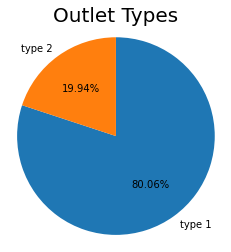

In [38]:
#pie chart chosen to show the most of the bigmarts outlets relay in which side 
outlet_type = Big_Mart_2['outlet_type'].value_counts()

plt.pie(outlet_type, labels = outlet_type.index, startangle = 90, counterclock = False, autopct="%0.2f%%");
plt.title('Outlet Types', fontsize=20)
plt.axis('square');

### BigMart distrubuted thier market locations into Three parts in as shown in the next chart

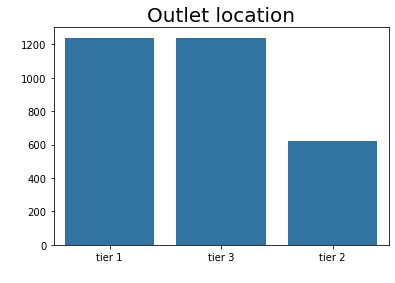

In [39]:
#the bar chart to show most of teh supermarkets that bigmart opens in which tier location 
Base_color=sns.color_palette()[0]
sns.countplot(data=Big_Mart_2, x='outlet_location_type',color=Base_color);
plt.title('Outlet location', fontsize=20);
plt.xlabel(' ');
plt.ylabel(' ');

### Bigmart divided thier sizes into three types as described in the upcoming chart

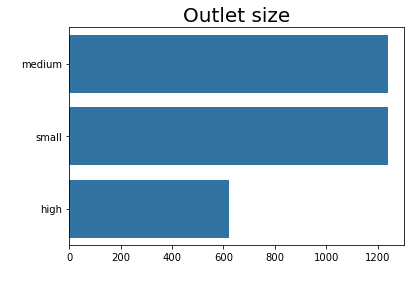

In [40]:
#chart to show the sizes of outlets
Base_color=sns.color_palette()[0]
sns.countplot(data=Big_Mart_2, y='outlet_size',color=Base_color);
plt.title('Outlet size', fontsize=20);
plt.xlabel(' ');
plt.ylabel(' ');

### in the upcoming chart you can see that BigMart golden establisment years was between 1995 till 2000 

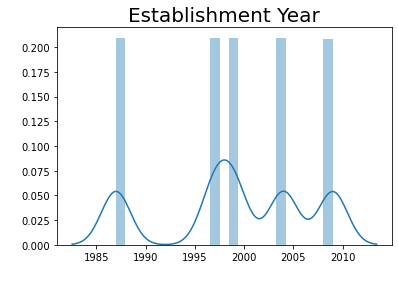

In [41]:
#displot to describe the most years that bigmart establish their outlet in it 
sns.distplot(Big_Mart_2['outlet_establishment_year']);
plt.title('Establishment Year', fontsize=20);
plt.xlabel(' ');
plt.ylabel(' ');

### the next chart reprsents all the items inside the BigMart stores based on most avaiable products till the least ones

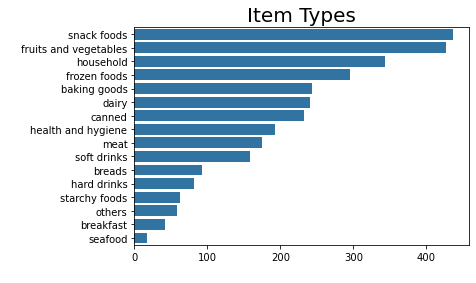

In [42]:
#count plot is used to show all items ordered by its high count 
Base_color=sns.color_palette()[0]
sns.countplot(data=Big_Mart_2, y='item_type',color=Base_color,order=item_order);
plt.title('Item Types', fontsize=20);
plt.xlabel(' ');
plt.ylabel(' ');

### the upcoming chart shows the most high pricing products in the market 

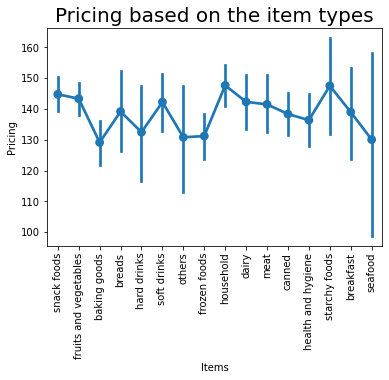

In [43]:
#point plot used to describe the expenseive products 
color_base=sns.color_palette()[0]
sns.pointplot(data=Big_Mart_2,y='max_retail_price',x='item_type', color=color_base,dodge=True);
plt.xticks(rotation=90);
#color_base=sns.color_palette()[0]
#sns.pointplot(data=Big_Mart_2,y='max_retail_price',x='item_type', color=color_base,linestyles=" ",dodge=True);
#plt.xticks(rotation=90);
plt.title('Pricing based on the item types', fontsize=20);
plt.xlabel('Items');
plt.ylabel('Pricing');

### According to the pervious chart we found that retail price affected by the type of the products 

### the next chart describe teh two types of the fat content products and clarify that the low fats products is higher price than the regular fats 

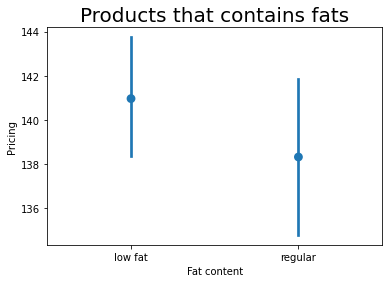

In [44]:
#chart to show the relation between fat content products and its pricing 
color_base=sns.color_palette()[0]
sns.pointplot(data=Big_Mart_2,y='max_retail_price',x='fat_content', color=color_base,linestyles=" ",dodge=True);
plt.title('Products that contains fats', fontsize=20);
plt.xlabel('Fat content');
plt.ylabel('Pricing');

### According to the pervious chart we found that retail price affected by the fat content products 

### the chart show the weak relation between the products visiablity and its pricing 

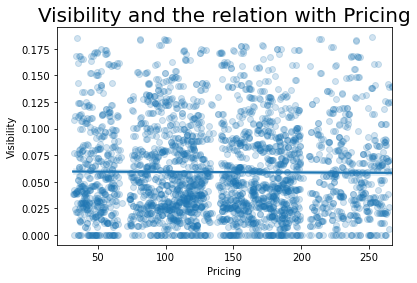

In [45]:
#regplot funtion to show the relation between max_retail_price and visibility
color_base=sns.color_palette()[0]
sns.regplot(data=Big_Mart_2 , y ='visibility', x ='max_retail_price', x_jitter=0.3,scatter_kws=({'alpha':1/5}));
plt.title('Visibility and the relation with Pricing', fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Visibility');

### in the upcoming chart you will found that there is no clear correlation between products weight, visibility and the product pricing 

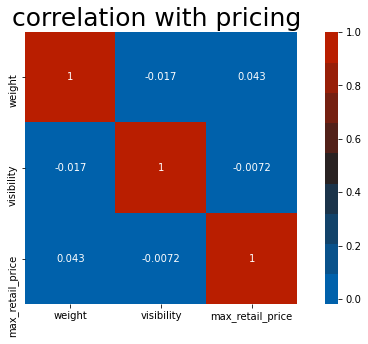

In [46]:
#checking if there correlation between data 
f, ax = plt.subplots(figsize=(10, 5))
corr = Big_Mart_2.drop(['item_identifier','fat_content','outlet_identifier','outlet_establishment_year','outlet_location_type','outlet_type'], axis=1).corr()
#matplotlib.rcParams.update({'font.size': 15})
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, s=105, l=40, n=9, center="dark"), square=True, ax=ax, annot = True)
mp.set_title(label='correlation with pricing ', fontsize=25);

### in the upcoming chart you will see the effect of the fat content product and item type on the product 

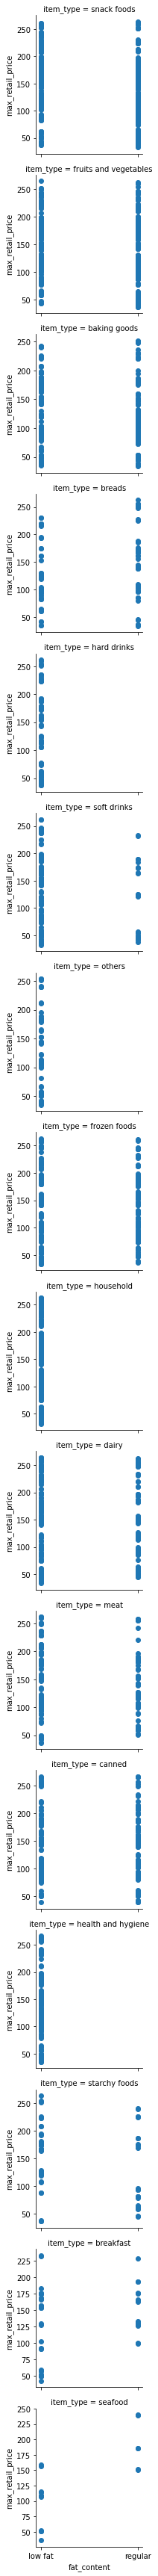

In [47]:
#checking the effect of the fat content product on price per each product 
g = sns.FacetGrid(data = Big_Mart_2, col = 'item_type', col_wrap=1, sharey=False,margin_titles=True)
g.map(plt.scatter,'fat_content','max_retail_price');

### According to the pervious chart we found that retail price affected by both the product type and the fat content products 


# Conclusions

## The two factors that affect the maxiuam retail pricing are the item type and the fat content of the prodcuct 

# Limitaion
there was many nulls in the set and the nulls was in columns that believed its important to use it so it wasn't the best option for me to delete around 1000 record but i had no other option of the set 

# References                                                                                                                     
A. stackoverflow                                                                                                               
B. Kaggle                                                                                                                       
C. Matplotlip/Seaborn documentations                                            


In [48]:
!jupyter nbconvert Big_Mart.ipynb --to slides

[NbConvertApp] Converting notebook Big_Mart.ipynb to slides
[NbConvertApp] Writing 605014 bytes to Big_Mart.slides.html
